# Data Analysis Project: Bike Sharing Dataset



*   Nama : Muhammad Habibullah
*   Email: muh.habibullah08@gmail.com




# Defining Business Questions


1. Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?
2. Bagaimana pola penyewaan sepeda berdasarkan musim?
3. Bagaimana pola penyewaan sepeda berdasarkan cuaca?
4. Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?
5. Bagaimana Perbandingan penyewa sepeda setiap hari?

# Import Library

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# File Path

In [4]:
day = "/content/drive/MyDrive/Dicoding/Final Assignment Analis Data/Data/day.csv"
hour = "/content/drive/MyDrive/Dicoding/Final Assignment Analis Data/Data/hour.csv"

# Data Wrangling

## Gathering Data

In [5]:
# Gathering Day csv

day_df = pd.read_csv(day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Gathering Hour csv

hour_df = pd.read_csv(hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Asessing Data

Tujuan assessing data adalah memeriksa tipe data dari tiap kolom yang terdapat dalam bike_df

**Mengecek Tipe Data**

In [7]:
# Mengecek Tipe Data

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# Asessing hour data

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan day_df dan hour_df, Semua tipe data di atas sesuai dan tidak ada yang perlu di rubah.

**Mengecek duplikasi**

In [9]:
# Mengecek duplikasi pada day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
# Mengecek duplikasi pada hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Berdasarkan day_df dan hour_df, tidak ditemukan data duplikasi.

In [11]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [12]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Clean Data


Pada tahap cleaning data, hal yang akan di clean adalah mengubah angka menjadi keterangan pada kolom day, month, season, weakday, wheater.

In [13]:
# Mengubah angka menjadi keterangan pada day_df

day_df['mnth'] = day_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

day_df['yr'] = day_df['yr'].map({
    0: '2011', 1: '2012'
})

day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['yr'] = day_df.yr.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,Sat,Holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,Holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,Workingday,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,Workingday,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,Workingday,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
# Mengubah angka menjadi keterangan pada hour_df

hour_df['mnth'] = hour_df['mnth'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

hour_df['yr'] = hour_df['yr'].map({
    0: '2011', 1: '2012'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0: 'Holiday', 1: 'Workingday'
})

# Mengubaha tipe data ke categorical
hour_df['season'] = hour_df.season.astype('category')
hour_df['yr'] = hour_df.yr.astype('category')
hour_df['mnth'] = hour_df.mnth.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weathersit'] = hour_df.weathersit.astype('category')

hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,1,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,2,0,Sat,Holiday,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,3,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,4,0,Sat,Holiday,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Save Cleaned Data

Tujuannya mempercepat pembuatan dashboard streamlit

In [27]:
day_df.to_csv("/content/drive/MyDrive/Dicoding/Final Assignment Analis Data/cleaned_bikeshare_day.csv", index=False)

# Exploratory Data Analysis



## **Trend penyewaan sepeda**

In [16]:
trend_bike = day_df.groupby(by='yr').agg({
    'cnt': 'mean'
})

trend_bike.head()


,cnt
yr,
2011,3405.761644
2012,5599.934426


Berdasarkan hasil diatas disimpulkan bahwa trend penyewaan sepeda mengalami di 2012 dari 2011.  

## **Pengelompokan penyewa sepeda (baik casual dan registered) berdasarkan season**

In [17]:
day_df.groupby('season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])


casual   registered   cnt                   
               mean         mean   max   min         mean
season                                                   
Spring   334.928177  2269.204420  7836   431  2604.132597
Summer  1106.097826  3886.233696  8362   795  4992.331522
Fall    1202.611702  4441.691489  8714  1115  5644.303191
Winter   729.112360  3999.050562  8555    22  4728.162921

Berdasarkan hasil diatas disimpulkan bahwa penyewaan sepeda tertinggi di musim Fall. Sedangkan paling sedikit di musim winter.  

## **Pengelompokan penyewa sepeda (baik casual dan registered) berdasarkan kondisi cuaca**

In [18]:

day_df.groupby(by='weathersit').agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})


cnt                           
                      max  min         mean      sum
weathersit                                          
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

Berdasarkan hasil diatas disimpulkan bahwa penyewaan sepeda paling banyak saat cuaca cerah (clear)

## **Perbandingan penyewa sepeda setiap hari**

In [19]:
day_df.groupby(by='weekday').agg({
    'cnt':['max','min','mean']
}).reindex (['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])


cnt                   
          max   min         mean
weekday                         
Sun      8227   605  4228.828571
Mon      7525    22  4338.123810
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462
Thu      7804   431  4667.259615
Fri      8362  1167  4690.288462
Sat      8714   627  4550.542857

Berdasarkan hasil diatas dapat ditemukan pola peningkatakan penyewaan sepeda terjadi secara konstan diantara hari senin sampai jumat. Kemudian penyewaan sepeda mengalami penurunan di hari sabtu dan minggu. Hal itu menunjukan bahwa masyarakat sering menyewa sepeda pada hari kerja (dari senin sampai jumat) daripada hari libur.     

## **Perbandingan penyewa sepeda di hari libur dan hari kerja**

In [20]:
day_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})


cnt                  
             max  min         mean
workingday                        
Holiday     8714  605  4330.168831
Workingday  8362   22  4584.820000

Berdasarkan hasil diatas menunjukan perbandingan penyewaan sepeda antara working day dan weekdays dimana penyewaan sepeda paling banyak terjadi di working day.  

# Visualization & Explanatory Analysis

## **Pertanyaan 1 : Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?**

In [21]:
trend_bike = trend_bike.reset_index()

trend_bike.head()

,yr,cnt
0,2011,3405.761644
1,2012,5599.934426


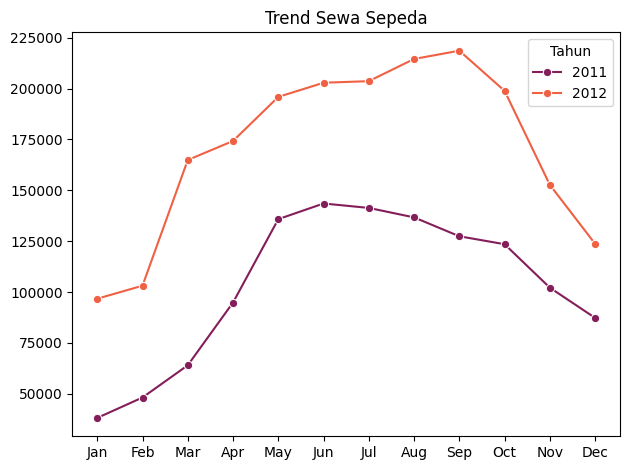

In [22]:
day_df['mnth'] = pd.Categorical(day_df['mnth'], categories=
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    ordered=True)

monthly_counts = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="rocket",
    marker="o")

plt.title("Trend Sewa Sepeda")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

Berdasarkan hasil box plot disimpulkan bahwa trend penyewaan sepeda mengalami peningkatan di 2012 dari 2011.

## **Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan musim?**

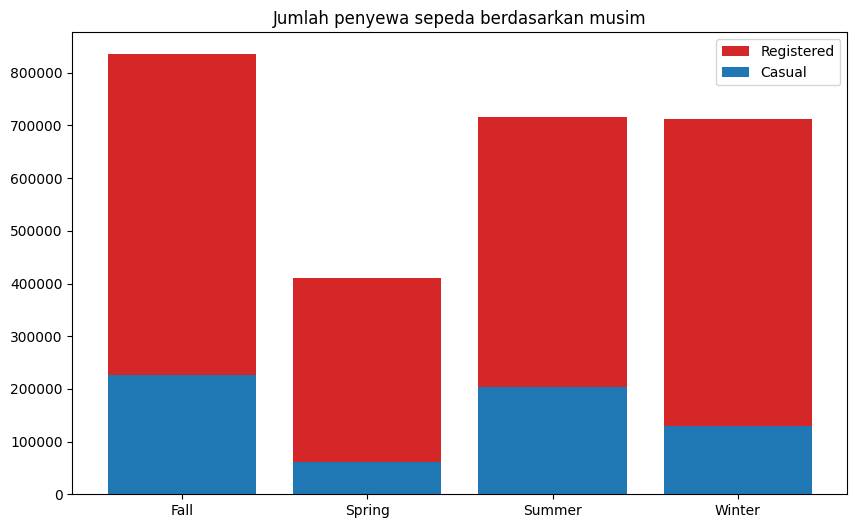

In [23]:
season_pattern = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

urutan_musim = ['spring', 'summer', 'fall', 'winter']

plt.figure(figsize=(10, 6))

plt.bar(
    season_pattern['season'],
    season_pattern['registered'],
    label='Registered',
    color='tab:red'
)

plt.bar(
    season_pattern['season'],
    season_pattern['casual'],
    label='Casual',
    color='tab:blue',
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewa sepeda berdasarkan musim')
plt.legend()
plt.show()

Berdasarkan diagaram diatas menunjukan pola penyewaan sepeda dimana musim spring menunjukan penyewa sepeda terdikit. Kemudian mengalami kenaikan di musim summer dan Fall sebagai musim dengan penyewa sepeda terbanyak. Kemudian penyewaan sepeda mengalami penurunan sedikit di musim winter.

## **Pertanyaan 3 : Bagaimana pola penyewaan sepeda berdasarkan cuaca?**

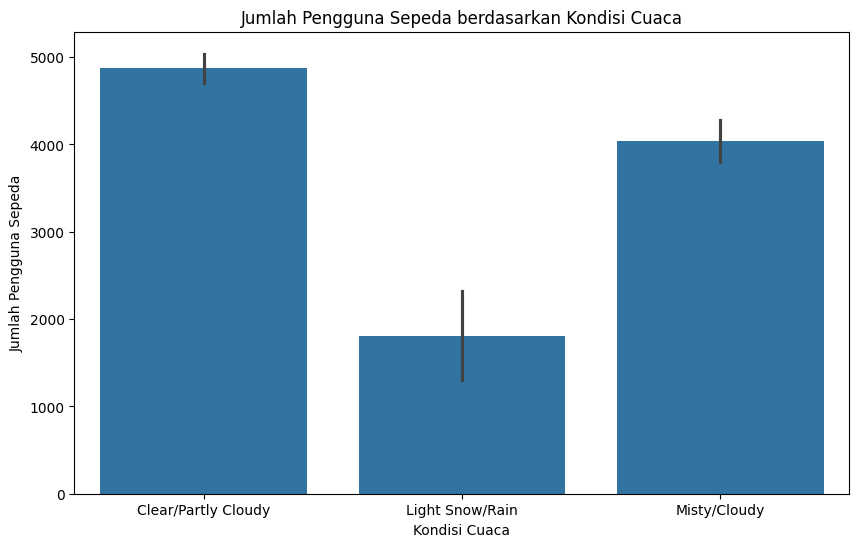

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weathersit',
    y='cnt',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan diagaram diatas menunjukan pola penyewaan sepeda berdasarkan cuaca dimana penyewaan sepeda terbanyak saat cuaca cerah (clear). Selain itu, penyewaan sepeda terdikit saat cuaca hujan.  

## **Pertanyaan 4 : Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?**

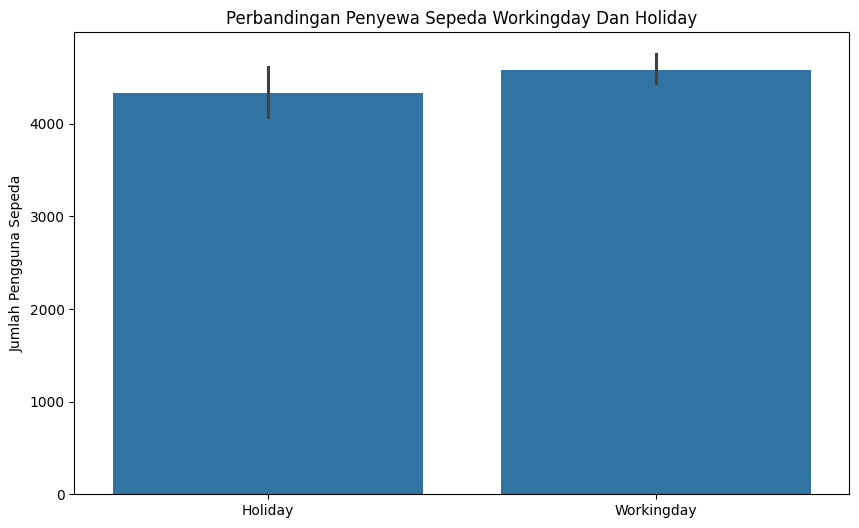

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='workingday',
    y='cnt',
    data=day_df)

plt.title('Perbandingan Penyewa Sepeda Workingday Dan Holiday')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Diagaram diatas menunjukan perbadningan penyewaan sepeda di holiday dan workingday dimana penyewaan sepeda paling banyak saat workingday. Hal ini menunjukan bahwa penyewaan sepeda digunakan untuk bekerja.  

## **Pertanyaan 5 : Bagaimana Perbandingan penyewa sepeda setiap hari**

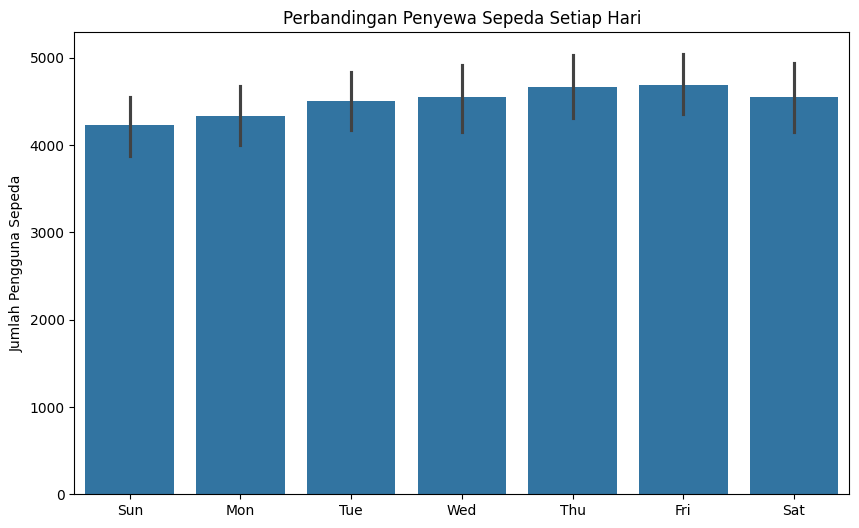

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='cnt',
    data=day_df,
    order=['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])

plt.title('Perbandingan Penyewa Sepeda Setiap Hari')
plt.xlabel(None)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()

Berdasarkan diagaram diatas menunjukan pola penyewaan sepeda setiap hari dimana pola peningkatakan penyewaan sepeda terjadi secara konstan diantara hari senin sampai jumat. Kemudian penyewaan sepeda mengalami penurunan di hari sabtu dan minggu. Hal itu menunjukan bahwa masyarakat sering menyewa sepeda pada hari kerja (dari senin sampai jumat) daripada hari libur.

# **Conclusion**

---



## **Pertanyaan 1 : Bagaimana tren jumlah pengguna sepeda dalam beberapa tahun terakhir?**

Trend penyewaan sepeda mengalami peningkatan di 2012 dari 2011. Penyewaan sepeda mengalami saat pertengahan tahun, yaitu bulan May hingga September, dan mengalami penurunan saat di awal tahun dan akhir tahun.

## **Pertanyaan 2 : Bagaimana pola penyewaan sepeda berdasarkan musim?**

 Pola penyewaan sepeda berdasarkan musim mengalami kenaikan sedikit demi sedikit setiap musimnya. Di mulai dari musim spring yang menunjukan penyewaan sepeda terdikit. Kemudian mengalami kenaikan di musim summer dan Fall sebagai musim dengan penyewa sepeda terbanyak. Kemudian penyewaan sepeda mengalami penurunan sedikit di musim winter.

## **Pertanyaan 3 : Bagaimana pola penyewaan sepeda berdasarkan cuaca?**

Pola penyewaan sepeda berdasarkan cuaca menunjukan bahwa pengguna sepeda paling banyak saat cuaca cerah (clear). Artinya adalah jumlah penyewaan sepeda terjadi saat cuaca cerah. Disisi lain, penyewaan sepeda mengalami penurunan sedikit saat cuaca berawan (cloudy). Selain itu, penyewaan sepeda terdikit saat cuaca hujan.

## **Pertanyaan 4 : Bagaimana perbandingan penyewaan sepeda antara hari libur dan hari kerja?**

Jumlah penyewaan sepeda terjadi paling banyak saat workingday. Hal ini menunjukan bahwa masyarakat menggunakan sepeda untuk aktivitas harian seperti bekerja, sekolah, membeli kebutuhan pokok dan aktivitas lainnya.

## **Pertanyaan 5 : Bagaimana Perbandingan penyewa sepeda setiap hari**

Pola penyewaan sepeda setiap hari dimana pola peningkatakan penyewaan sepeda terjadi secara konstan diantara hari senin sampai jumat. Kemudian penyewaan sepeda mengalami penurunan di hari sabtu dan minggu. Hal itu menunjukan bahwa masyarakat sering menyewa sepeda pada hari kerja (dari senin sampai jumat) daripada hari libur.